In [ ]:
import numpy as np
import os
import json
import pycpd
from matplotlib import pyplot as plt

In [2]:
def extract_annotation(data):
    for item in data:
        if 'classification' in item['properties']:
            if item['properties']['classification']['name'] == 'Region*':
                annotation_list = []
                for sublist in item['geometry']['coordinates']:
                    for sublist2 in sublist:
                        for point in sublist2:
                            annotation_list.append(point)
                return np.array(annotation_list)

In [3]:
file_path_anno = ['data/Annotation-C.json', 
                  'data/Annotation-D.json',
                  'data/Annotation-E.json',
                  'data/Annotation-F.json',
                  'data/Annotation-G.json',
                  'data/Annotation-H.json']

x_annotations = []
y_annotations = []

for path in file_path_anno:
    annotation = []
    with open(path) as f:
        data = json.load(f)
    annotation = extract_annotation(data)
    x_annotation = annotation[:,0]
    x_annotations.append(x_annotation)
    y_annotation = annotation[:,1]
    y_annotations.append(y_annotation)

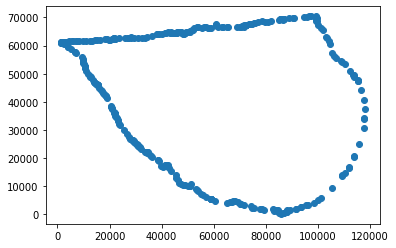

In [4]:
# Annotation C
plt.scatter(x_annotations[0],y_annotations[0])

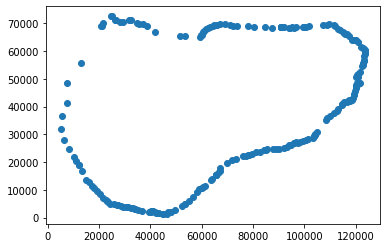

In [5]:
# Annotation D
plt.scatter(x_annotations[1],y_annotations[1])

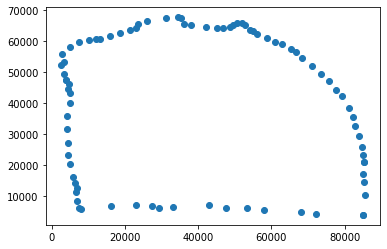

In [6]:
# Annotation E
plt.scatter(x_annotations[2],y_annotations[2])

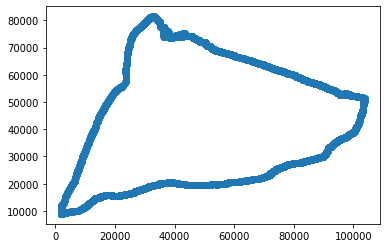

In [7]:
# Annotation F
plt.scatter(x_annotations[3],y_annotations[3])

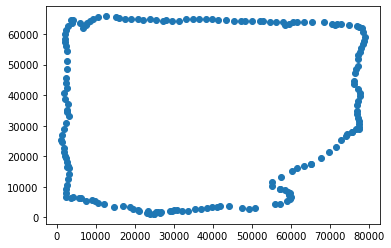

In [8]:
# Annotation G
plt.scatter(x_annotations[4],y_annotations[4])

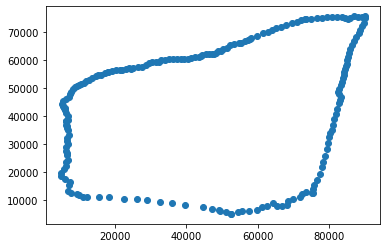

In [9]:
# Annotation H
plt.scatter(x_annotations[5],y_annotations[5])

In [10]:
file_path_cut = ['data/Schnitt-C.obj', 
                 'data/Schnitt-D.obj',
                 'data/Schnitt-E.obj',
                 'data/Schnitt-F.obj',
                 'data/Schnitt-G.obj',
                 'data/Schnitt-H.obj']
x_cuts = []
y_cuts = []

for path in file_path_cut:
    with open(path) as f:
        readlines = f.readlines()
    l = []
    for line in readlines:
        if line.startswith('l '):
            lines = line.split(' ')
            if lines[1] not in l:
                l.append(int(lines[1]))
            if lines[2] not in l:
                l.append(int(lines[2]))
                
    x_cut = []
    y_cut = []
    for index in l:
        splitted = readlines[index-1].split(' ')
        x_cut.append(float(splitted[3]))
        y_cut.append(float(splitted[1]))
    x_cuts.append(x_cut)
    y_cuts.append(y_cut)

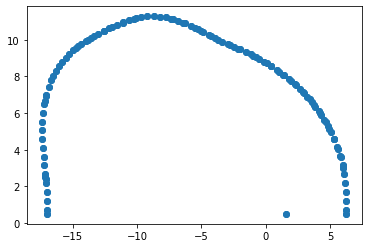

In [11]:
# Schnitt C
plt.scatter(x_cuts[0], y_cuts[0])

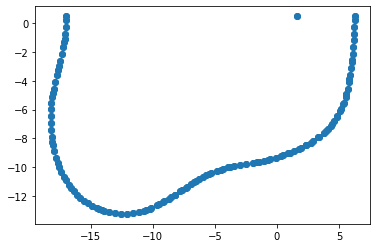

In [12]:
# Schnitt D
plt.scatter(x_cuts[1], y_cuts[1])

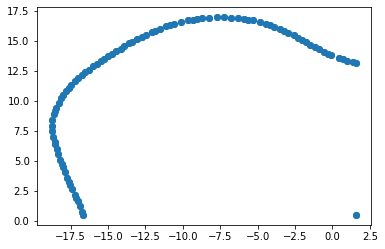

In [13]:
# Schnitt E
plt.scatter(x_cuts[2], y_cuts[2])

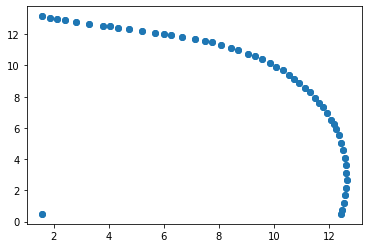

In [14]:
# Schnitt F
plt.scatter(x_cuts[3], y_cuts[3])

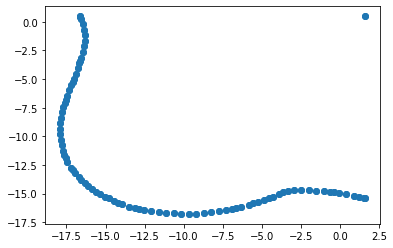

In [15]:
# Schnitt G
plt.scatter(x_cuts[4], y_cuts[4])

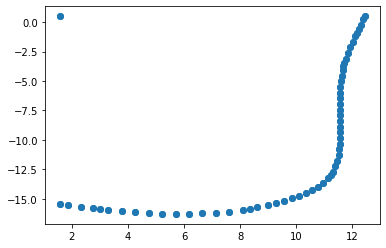

In [16]:
# Schnitt H
plt.scatter(x_cuts[5], y_cuts[5])

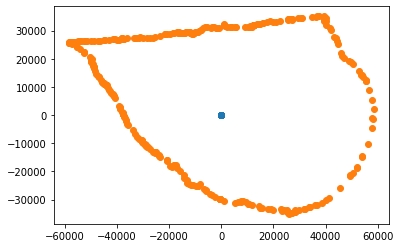

In [17]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
x_edited_anns=[]
y_edited_anns=[]
x_edited_cuts=[]
y_edited_cuts=[]

def center_list(list):
    #extrema bestimmen
    min_list=min(list)
    max_list=max(list)
    
    #vesrschiebung errechnen
    center=(min_list+max_list)/2
    
    #Punkte verschieben
    return_list=np.array(list)-center
    
    return return_list

for i in range(0, len(x_cuts)):
    x_edited_anns.append(center_list(x_annotations[i]))
    y_edited_anns.append(center_list(y_annotations[i]))
    x_edited_cuts.append(center_list(x_cuts[i]))
    y_edited_cuts.append(center_list(y_cuts[i]))
    
plt.scatter(x_edited_cuts[0],y_edited_cuts[0])
plt.scatter(x_edited_anns[0],y_edited_anns[0])

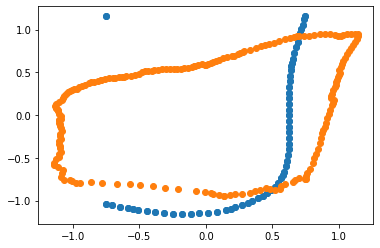

In [18]:
# *Abstände zum Nullpunkt normalisieren
def scale_lists(x_list,y_list):
    dists=np.sqrt(x_list**2 + y_list**2)
    avrg_dist=np.average(dists)
    scaled_x_list=x_list/avrg_dist
    scaled_y_list=y_list/avrg_dist
    return scaled_x_list, scaled_y_list

for i in range(0,len(x_edited_anns)):
    x_edited_anns[i],y_edited_anns[i]= scale_lists(x_edited_anns[i],y_edited_anns[i])
    
for i in range(0,len(x_edited_cuts)):
    x_edited_cuts[i],y_edited_cuts[i]= scale_lists(x_edited_cuts[i],y_edited_cuts[i])

plt.scatter(x_edited_cuts[5],y_edited_cuts[5])
plt.scatter(x_edited_anns[5],y_edited_anns[5])

<Figure size 432x288 with 0 Axes>

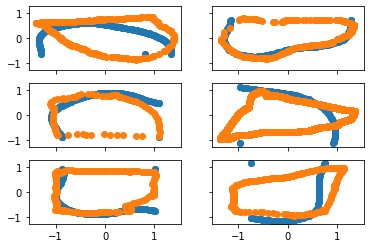

In [19]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(x_edited_anns[i],y_edited_anns[i])
    
#Ergebisse sind Falsch Rotiert und sehen hier verzerrt aus, aber die Ergenisse sollten okay sein 

In [20]:
# Flipping und Rotation für das Anpassen der Annotationen
def flip(x_list):
    new_x_list = []
    max_x=max(x_list)
    min_x=min(x_list)
    for x in x_list:
        new_x = min_x + max_x-x
        new_x_list.append(new_x)
    return new_x_list

def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
#    return list(np.moveaxis(a, axis, 0))


def rotate(x_list,y_list,radians):
    theta = np.radians(radians)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    new_coord_list =  []
    new_x_list = []
    new_y_list =  []
    arr = np.stack((x_list,y_list), axis=-1)
    for coord in arr:
        coord = coord.flatten()
        new_coord = R.dot(coord)
        new_coord_list.append(new_coord)
    new_coord_list = np.asfarray(new_coord_list)
    for coord in new_coord_list:
        x,y, = unstack(coord)
        new_x_list.append(x)
        new_y_list.append(y)
    return new_x_list, new_y_list
    
    

In [21]:
collection_x_anns =[]
collection_y_anns = []

# Datei C - vertikaler & horizontaler Flip
x_flipped_anns_c= flip(x_edited_anns[0])
y_flipped_anns_c = flip(y_edited_anns[0])
collection_x_anns.append(x_flipped_anns_c)
collection_y_anns.append(y_flipped_anns_c)

# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen
x_flipped_anns_d= x_edited_anns[1]
y_flipped_anns_d= y_edited_anns[1]
collection_x_anns.append(x_flipped_anns_d)
collection_y_anns.append(y_flipped_anns_d)

# Datei E - 90° Rotation
x_flipped_anns_e = flip(x_edited_anns[2])
x_flipped_anns_e, y_flipped_anns_e= rotate(x_flipped_anns_e, y_edited_anns[2],0)
collection_x_anns.append(x_flipped_anns_e)
collection_y_anns.append(y_flipped_anns_e)

# Datei F - vertikaler Flip - 25° Rotation
x_flipped_anns_f= x_edited_anns[3]
y_flipped_anns_f = flip(y_edited_anns[3])
x_flipped_anns_f, y_flipped_anns_f = rotate(x_flipped_anns_f, y_flipped_anns_f,335)
collection_x_anns.append(x_flipped_anns_f)
collection_y_anns.append(y_flipped_anns_f)

# Datei G - horizontaler Flip
x_flipped_anns_g= flip(x_edited_anns[4])
y_flipped_anns_g = y_edited_anns[4]
collection_x_anns.append(x_flipped_anns_g)
collection_y_anns.append(y_flipped_anns_g)

# Datei H - vertikaler & horizontaler Flip
x_flipped_anns_h= flip(x_edited_anns[5])
y_flipped_anns_h = flip(y_edited_anns[5])
collection_x_anns.append(x_flipped_anns_h)
collection_y_anns.append(y_flipped_anns_h)

In [22]:
# Umstrukturieren der Punkte
Y = np.array([x_edited_anns[0].tolist(),y_edited_anns[0].tolist()])
X = np.array([x_edited_cuts[0].tolist(),y_edited_cuts[0].tolist()])

<Figure size 432x288 with 0 Axes>

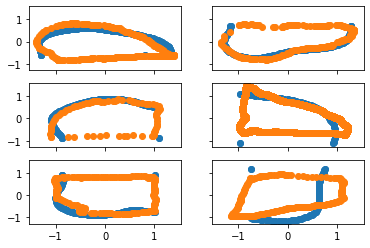

In [23]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [24]:
# *Upsampling - # Interpolation für mehr Punkte

def interpolate(x1, y1, center_x,center_y,midpoints_x, midpoints_y, ct):
    if midpoints_x == None and  midpoints_y == None:
        midpoints_x = []
        midpoints_y = []

    diff_m_x = (abs(x1-center_x)/ct)
    diff_m_y = (abs(y1-center_y)/ct)
    m_x = x1
    m_y = y1
    
    for i in range(0,ct):
        if x1 > center_x:
            m_x = m_x - diff_m_x
        elif x1 < center_x:
            m_x = m_x + diff_m_x
        if y1 > center_y:
            m_y = m_y - diff_m_y
        elif y1 < center_y:
            m_y = m_y + diff_m_y
        
        midpoints_x.append(m_x)
        midpoints_y.append(m_y)

    return midpoints_x, midpoints_y


<Figure size 432x288 with 0 Axes>

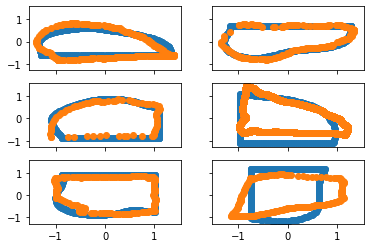

In [25]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)

for i in range(0,len(x_cuts)):

    x1 = x_edited_cuts[i][-2]
    y1 = y_edited_cuts[i][-2]#li. außen
    x2 = x_edited_cuts[i][-4]
    y2 = y_edited_cuts[i][-4]#re. außen
    c_x = x_edited_cuts[i][-1]
    c_y = y_edited_cuts[i][-1]#mitte
    

    
    #diff=len(collection_x_anns[i])-len(x_edited_cuts[i])
    #changed=False
    #if(diff%2==1):
    #    changed=True
    #    diff+=1
    midpoints_x1, midpoints_y1 = interpolate(x1, y1, c_x, c_y, None, None,int(50))
    #if(changed):
    #    diff-=1
    midpoints_x2, midpoints_y2 = interpolate(x2, y2, c_x, c_y,None, None,int(50))
    midpoints_x2 = np.array(midpoints_x2)
    midpoints_y2 = np.array(midpoints_y2)
    
    #print(len(x_edited_cuts[i]))
    #print(len(collection_x_anns[i]))
    #print(diff)
    #print(len(midpoints_x2))
    #print(len(midpoints_x1))
    #print("")
    
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x1)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y1)
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x2)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y2)
             

    
#plt.scatter( x_edited_cuts[0], y_edited_cuts[0])
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [26]:
# Interpolation 
# https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
# https://numpy.org/doc/stable/reference/generated/numpy.interp.html

for i in range(len(x_edited_cuts)): #geht durch alle annotationen 
    #vereinfache bennenung
    diff=len(collection_x_anns[i])-len(x_edited_cuts[i])
    xs = x_edited_cuts[i]  
    ys = y_edited_cuts[i]

    #plt.figure(figsize=(10,10))

    midpoints_x = []
    midpoints_y = []

    while (diff>0):
        for i_x in range(0,xs.shape[0]):
            idx1 = i_x
            idx2 = i_x+1
    
            if i_x == xs.shape[0]-1:
                idx2 = 0

            x1 = xs[idx1]
            x2 = xs[idx2]
            y1 = ys[idx1]
            y2 = ys[idx2]
            m_x = ((x1+x2)/2)
            m_y = ((y1+y2)/2)
            if(diff>0):
                midpoints_x.append(m_x)
                midpoints_y.append(m_y)
                diff=diff-1
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y)

    
    

In [27]:
diff=len(collection_x_anns[3])-len(x_edited_cuts[3])
print(diff)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

0


In [28]:
from functools import partial
from pycpd import AffineRegistration
import time

iteration: 1
0.006520748138427734
iteration: 2
0.004265189170837402
iteration: 3
0.0036771297454833984
iteration: 4
0.0032576918601989746
iteration: 5
0.003006124496459961
iteration: 6
0.0028383334477742514
iteration: 7
0.0026472296033586773
iteration: 8
0.0025661885738372803
iteration: 9
0.002447790569729275
iteration: 10
0.0024030923843383787
iteration: 11
0.00236632607199929
iteration: 12
0.0023358662923177085
iteration: 13
0.0022715421823354866
iteration: 14
0.0022521529878888813
iteration: 15
0.002202002207438151
iteration: 16
0.0021893829107284546
iteration: 17
0.0021488245795754824
iteration: 18
0.0021405617396036782
iteration: 19
0.002133331800761976
iteration: 20
0.0021265506744384765
iteration: 21
0.002120506195794968
iteration: 22
0.0021149895407936788
iteration: 23
0.002110004425048828
iteration: 24
0.002126246690750122
iteration: 25
0.002121257781982422
iteration: 26
0.002116533426138071
iteration: 27
0.0021307556717484084
iteration: 28
0.002126080649239676
iteration: 29
0

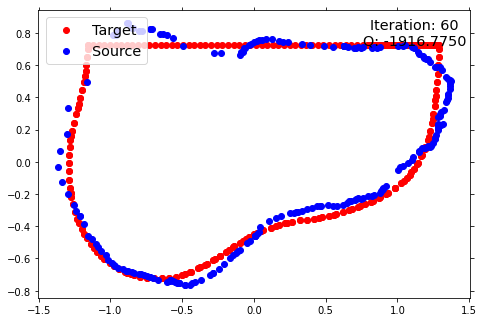

0.004842158158620199
iteration: 61
0.004803782603779777


In [29]:


start=0
end=1


def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==60):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)


# Umstrukturieren der Punkte
Y = np.array([collection_x_anns[1],collection_y_anns[1]])
X = np.array([x_edited_cuts[1].tolist(),y_edited_cuts[1].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=61)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()







iteration: 1
0.004500389099121094
iteration: 2
0.0037499666213989258
iteration: 3
0.0033336480458577475
iteration: 4
0.0031249523162841797
iteration: 5
0.003100013732910156
iteration: 6
0.003000060717264811
iteration: 7
0.003000020980834961
iteration: 8
0.0029374659061431885
iteration: 9
0.0028888914320203993
iteration: 10
0.002850031852722168
iteration: 11
0.002863623879172585
iteration: 12
0.0028333067893981934
iteration: 13
0.0028076722071721004
iteration: 14
0.002821411405290876
iteration: 15
0.00280001958211263
iteration: 16
0.0027812421321868896
iteration: 17
0.0027647018432617188
iteration: 18
0.0027777751286824546
iteration: 19
0.002789472278795744
iteration: 20
0.002799999713897705
iteration: 21
0.002857140132359096
iteration: 22
0.0028863603418523617
iteration: 23
0.0029347772183625593
iteration: 24
0.0029791692892710366
iteration: 25
0.0030399894714355467
iteration: 26
0.003096149517939641
iteration: 27
0.0031481407306812427
iteration: 28
0.003196443830217634
iteration: 29
0

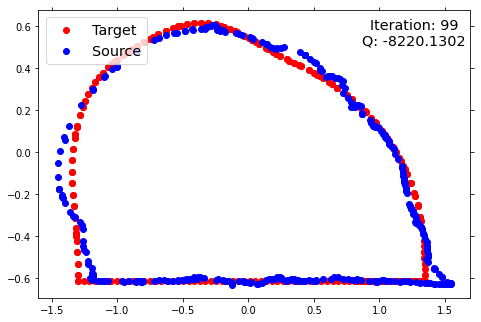

0.0059343395811138734
iteration: 100
0.005924999713897705


In [30]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
    
Y = np.array([collection_x_anns[0],collection_y_anns[0]])
X = np.array([x_edited_cuts[0].tolist(),y_edited_cuts[0].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
0.0010006427764892578
iteration: 2
0.0010002851486206055
iteration: 3
0.0010001659393310547
iteration: 4
0.0009999871253967285
iteration: 5
0.0009000778198242187
iteration: 6
0.000916759173075358
iteration: 7
0.0008571829114641462
iteration: 8
0.0008750557899475098
iteration: 9
0.0008889039357503256
iteration: 10
0.0008502006530761719
iteration: 11
0.0008636387911709872
iteration: 12
0.0008750160535176595
iteration: 13
0.0008846429678109976
iteration: 14
0.000857165881565639
iteration: 15
0.0008666833241780599
iteration: 16
0.0008437633514404297
iteration: 17
0.0008529494790469899
iteration: 18
0.0008611414167616102
iteration: 19
0.0008947598306756271
iteration: 20
0.0009000182151794433
iteration: 21
0.0009047985076904297
iteration: 22
0.0009091117165305398
iteration: 23
0.0009130602297575577
iteration: 24
0.0009166896343231201
iteration: 25
0.0009200096130371094
iteration: 26
0.0009423219240628756
iteration: 27
0.0009444907859519675
iteration: 28
0.0009464366095406669
ite

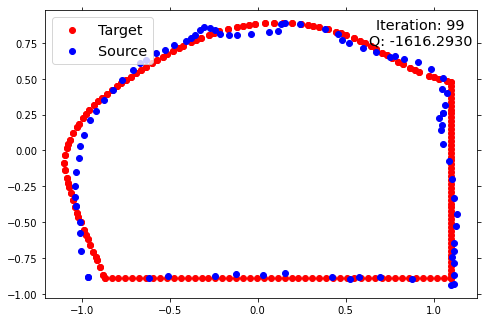

0.002484853821571427
iteration: 100
0.0024700236320495607


In [31]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[2],collection_y_anns[2]])
X = np.array([x_edited_cuts[2].tolist(),y_edited_cuts[2].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
12.223999738693237
iteration: 2
11.755749940872192
iteration: 3
10.882500092188517
iteration: 4
10.402625143527985
iteration: 5
10.081900024414063
iteration: 6
9.861749966939291
iteration: 7
9.702428681509835
iteration: 8
9.67243754863739
iteration: 9
9.78222221798367
iteration: 10
9.823400282859803
iteration: 11
9.86936371976679
iteration: 12
9.831250170866648
iteration: 13
9.777654005930973
iteration: 14
9.722428560256958
iteration: 15
9.671499999364217
iteration: 16
9.626937493681908
iteration: 17
9.586911762461943
iteration: 18
9.55144460995992
iteration: 19
9.517894807614779
iteration: 20
9.498675084114074
iteration: 21
9.539190576190041
iteration: 22
9.54481828212738
iteration: 23
9.52310880370762
iteration: 24
9.519812534252802
iteration: 25
9.500339975357056
iteration: 26
9.480673129741962
iteration: 27
9.463148276011148
iteration: 28
9.444625079631805
iteration: 29
9.460206936145651
iteration: 30
9.45920009613037
iteration: 31
9.445225961746708
iteration: 32
9.427

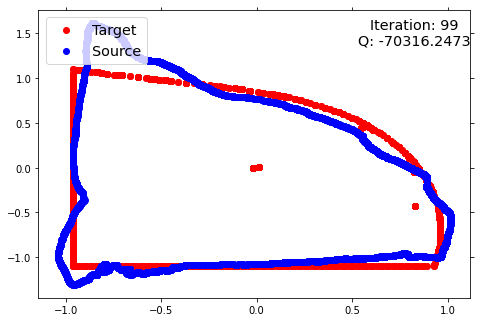

9.323328283098009
iteration: 100
9.318814997673035


In [32]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[3],collection_y_anns[3]])
X = np.array([x_edited_cuts[3].tolist(),y_edited_cuts[3].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
0.1960008144378662
iteration: 2
0.09874975681304932
iteration: 3
0.06633321444193523
iteration: 4
0.05000030994415283
iteration: 5
0.040199899673461915
iteration: 6
0.033750017484029136
iteration: 7
0.02907139914376395
iteration: 8
0.02562493085861206
iteration: 9
0.02288908428615994
iteration: 10
0.020749974250793456
iteration: 11
0.018954537131569603
iteration: 12
0.01750004291534424
iteration: 13
0.01623074824993427
iteration: 14
0.015142951692853655
iteration: 15
0.01423333485921224
iteration: 16
0.01340639591217041
iteration: 17
0.012676463407628676
iteration: 18
0.012027833196851943
iteration: 19
0.01147376863580001
iteration: 20
0.010949993133544922
iteration: 21
0.010476203191848029
iteration: 22
0.0100681565024636
iteration: 23
0.009674051533574644
iteration: 24
0.009312490622202555
iteration: 25
0.009000024795532226
iteration: 26
0.008711668161245493
iteration: 27
0.008425915682757343
iteration: 28
0.0081607529095241
iteration: 29
0.00791377856813628
iteration: 3

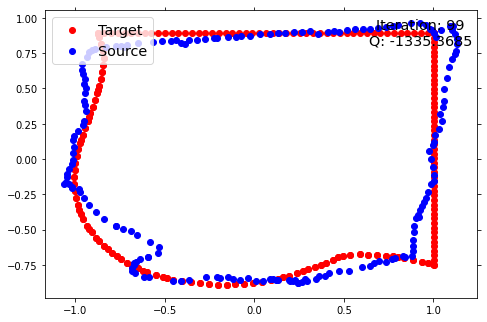

0.004611109242294774
iteration: 100
0.004580028057098388


In [33]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[4],collection_y_anns[4]])
X = np.array([x_edited_cuts[4].tolist(),y_edited_cuts[4].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
reg.register(callback)
plt.show()

iteration: 1
0.0020012855529785156
iteration: 2
0.001500248908996582
iteration: 3
0.0013333956400553386
iteration: 4
0.0013756155967712402
iteration: 5
0.0012999534606933593
iteration: 6
0.0012499888737996419
iteration: 7
0.0012860638754708426
iteration: 8
0.0012499690055847168
iteration: 9
0.0012221866183810765
iteration: 10
0.0012002706527709961
iteration: 11
0.0011817975477738814
iteration: 12
0.0011666615804036458
iteration: 13
0.001153890903179462
iteration: 14
0.0011787244251796178
iteration: 15
0.0011666456858317057
iteration: 16
0.0011562258005142212
iteration: 17
0.0011470458086799173
iteration: 18
0.0011388858159383137
iteration: 19
0.0011315722214548212
iteration: 20
0.0011249899864196778
iteration: 21
0.001119193576631092
iteration: 22
0.0011136423457752574
iteration: 23
0.0011087085889733355
iteration: 24
0.0011041462421417236
iteration: 25
0.0011201286315917968
iteration: 26
0.0011153679627638597
iteration: 27
0.0011296360581009477
iteration: 28
0.0011250206402369908
iter

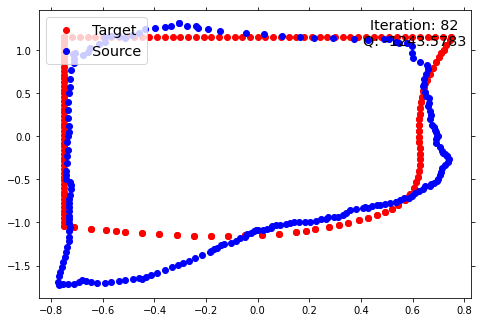

0.0029756063368262314
iteration: 83
0.002963850297123553


In [34]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==82):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[5],collection_y_anns[5]])
X = np.array([x_edited_cuts[5].tolist(),y_edited_cuts[5].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=83)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

i= 0
iteration: 1
0.02131366729736328
iteration: 2
0.015700936317443848
iteration: 3
0.013794660568237305
iteration: 4
0.012596070766448975
iteration: 5
0.01197671890258789
iteration: 6
0.011564175287882486
iteration: 7
0.01134075437273298
iteration: 8
0.01486051082611084
iteration: 9
0.014153771930270724
iteration: 10
0.01363842487335205
iteration: 11
0.013216733932495117
iteration: 12
0.012823641300201416
iteration: 13
0.012568088678213267
iteration: 14


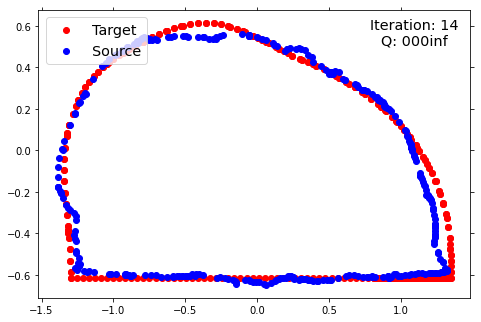

0.02327741895403181
iteration: 15
0.022525676091512046
iteration: 16
0.021805301308631897
iteration: 17
0.021169662475585938
iteration: 18
0.020660254690382216
i= 1
iteration: 1
0.00899958610534668
iteration: 2
0.007249593734741211
iteration: 3
0.006666342417399089
iteration: 4
0.006374835968017578
iteration: 5
0.006199693679809571
iteration: 6
0.0061664581298828125
iteration: 7
0.006071363176618304
iteration: 8
0.006062418222427368
iteration: 9
0.006055355072021484
iteration: 10
0.006049919128417969
iteration: 11
0.005999933589588512
iteration: 12
0.005999942620595296
iteration: 13
0.005961418151855469
iteration: 14


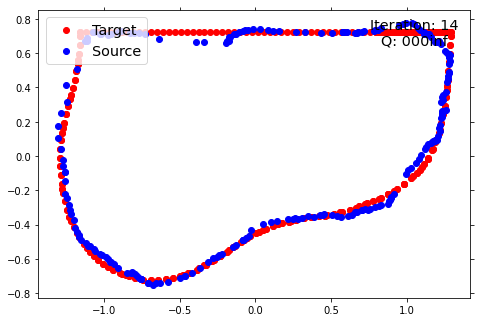

0.01692845140184675
iteration: 15
0.016266568501790365
iteration: 16
0.015624985098838806
i= 2
iteration: 1
0.003001689910888672
iteration: 2
0.0025005340576171875
iteration: 3
0.0023337205251057944
iteration: 4
0.0022501349449157715
iteration: 5
0.0022001266479492188
iteration: 6
0.0021668672561645508
iteration: 7
0.002143110547746931
iteration: 8
0.0021251440048217773
iteration: 9
0.0021112759908040366
iteration: 10
0.0021001338958740235
iteration: 11
0.0020454580133611507
iteration: 12
0.0020416975021362305
iteration: 13
0.0020387906294602612
iteration: 14


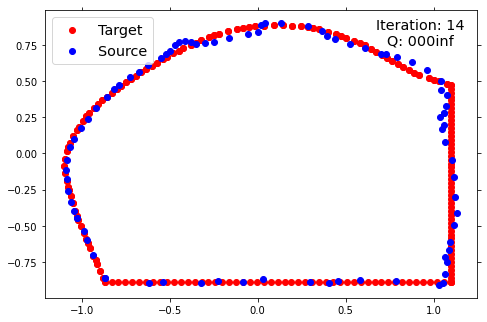

0.011571458407810755
iteration: 15
0.010966666539510091
i= 3
iteration: 1
123.075519323349
iteration: 2
99.41901445388794
iteration: 3
91.84317183494568
iteration: 4
88.3503355383873
iteration: 5
85.56886854171753
iteration: 6
83.7838904062907
iteration: 7
82.57540610858372
iteration: 8
86.03080376982689
iteration: 9
84.62193693055048
iteration: 10
83.49604306221008
iteration: 11
82.55608456785029
iteration: 12
82.06698813041051
iteration: 13
81.49341773986816
iteration: 14


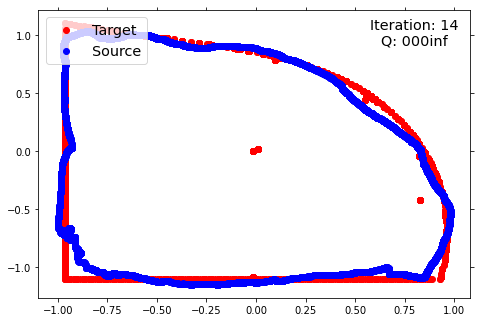

80.99695040498462
iteration: 15
80.42241950035095
iteration: 16
79.95245577394962
iteration: 17
79.68122311199413
iteration: 18
79.31432183583577
i= 4
iteration: 1
0.4609999656677246
iteration: 2
0.24849998950958252
iteration: 3
0.1764997641245524
iteration: 4
0.13437503576278687
iteration: 5
0.10859994888305664
iteration: 6
0.09608328342437744
iteration: 7
0.08321424892970494
iteration: 8
0.07668742537498474
iteration: 9
0.06905550426907009
iteration: 10
0.06349995136260986
iteration: 11
0.059818137775767936
iteration: 12
0.055666605631510414
iteration: 13
0.05188457782451923
iteration: 14


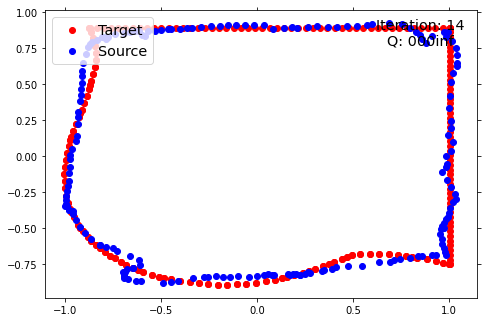

0.06739286014011928
iteration: 15
0.06326665878295898
i= 5
iteration: 1
0.008501291275024414
iteration: 2
0.006750226020812988
iteration: 3
0.006000041961669922
iteration: 4
0.008625030517578125
iteration: 5
0.007800149917602539
iteration: 6
0.007250110308329265
iteration: 7
0.006857258932931083
iteration: 8
0.0065625011920928955
iteration: 9
0.006444454193115234
iteration: 10
0.00625002384185791
iteration: 11
0.006090901114723899
iteration: 12
0.0059583187103271484
iteration: 13
0.005846151938805213
iteration: 14


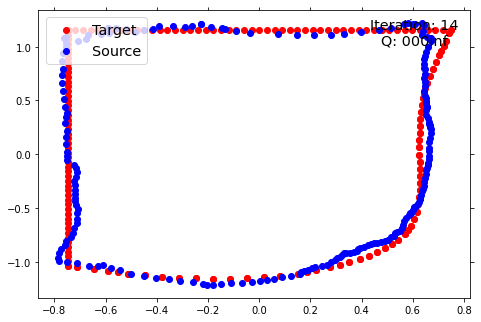

0.016999994005475725
iteration: 15
0.01619998613993327
iteration: 16
0.015468761324882507
iteration: 17
0.01485294454237994


In [31]:
from pycpd import DeformableRegistration

def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==14):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
    
for i in range(len(x_edited_cuts)):
    print("i=",i)
    Y = np.array([collection_x_anns[i],collection_y_anns[i]])
    X = np.array([x_edited_cuts[i].tolist(),y_edited_cuts[i].tolist()])
    X=np.swapaxes(X, 0, 1)
    Y=np.swapaxes(Y, 0, 1)


    xLabels = ["X1", "X2", "X3"]
    yLabels = ["Y1", "Y2", "Y3"]

    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    callback = partial(visualize, ax=fig.axes[0])


    dictio=({'X': X, 'Y': Y})
    start=time.time()
    reg = DeformableRegistration(**dictio)

    reg.register(callback)
    plt.show()